# Anime Face Detection

Members:\
Mayuresh Nerurkar (101429375)\
Mae Lam (101439274)\
Ho Kong Leung ()\
Wai Hong Fung (101448027)

## Abstract

This study introduces a convolutional neural network (CNN) model tailored to detect and localize anime faces from images. Drawing from a dataset of anime images, labels were annotated in the YOLO (You Only Look Once) format, which provides coordinates for bounding boxes encapsulating each face.

The model was constructed from scratch, accompanied by an interactive loss graph, facilitating real-time monitoring of the training progression. Average Intersection over Union (IoU) was employed as the evaluation metric, offering insights into the precision of the bounding box predictions made by the model.

To ensure optimization and prevent overfitting, early stopping was integrated, capturing the model iteration with the highest accuracy. The project further delved into hyperparameter tuning, conducting five experiments manipulating variables such as batch size, epochs, learning rate, and kernel size. Leveraging the Pytorch framework, our results underline the efficacy of the proposed model in the niche realm of anime face detection.


## Introduction

The problem at hand revolves around the intricate task of detecting faces in anime images. Unlike conventional face detection in real-world photographs, anime characters exhibit a diverse range of artistic styles, exaggerated features, and unconventional proportions. These unique traits make the automated detection of anime faces a challenging endeavor.

The challenge lies in devising a solution that can discern and localize faces across this extensive spectrum of artistic variations. Such a solution must be equipped to handle varying line weights, shapes, sizes, and stylistic deviations, while also accounting for the vast array of emotions that anime characters portray. By developing an effective anime face detection system, we aim to bridge the gap between computer vision and the intricate world of anime art, facilitating automated content analysis and enhancing user experiences in the realm of anime-related applications.

The importance of accurate anime face detection extends beyond the confines of the anime enthusiast community and touches upon broader aspects of technology and entertainment. Here are some reasons why this project scope holds significance:

1. Content Management and Recommendation: Streaming platforms and online databases catering to anime content require efficient tools to categorize, tag, and recommend shows based on characters and themes. An effective anime face detection system aids in automating these processes, enhancing content discoverability for viewers.
2. Fan Engagement and Analytics: Fans often create and share fan art, memes, and other creative content based on their favorite anime characters. A robust face detection system can facilitate analyzing fan-generated content, offering insights into trends, character popularity, and community engagement.
3. Visual Search and Indexing: For users seeking specific scenes or episodes within a vast library of anime, a face detection system can serve as a powerful visual search tool. It allows users to locate episodes or moments featuring their favorite characters quickly and efficiently.
4. Character Identification and Cosplay: Anime conventions and cosplay events attract enthusiasts who embody their favorite characters. Accurate face detection aids in identifying characters in crowds and helps event organizers manage and celebrate the diverse array of cosplayers.


## Related Work

## Data
    
The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/andy8744/annotated-anime-faces-dataset), comprises 6640 anime images derived from the top 100 daily rankings on pixiv. The creator of this dataset employed nagadomi's face detector designed for anime/manga using OpenCV. To facilitate its usage, the original dataset underwent a transformation into YOLOv5 PyTorch TXT Annotation Format and was subsequently divided into training, testing, and validation sets in an 80/10/10 ratio using roboflow.

In an effort to ensure data quality and accuracy, a preprocessing step was undertaken to validate that each image had an accompanying label. This is a crucial step because the presence of corresponding labels is essential for effective training of machine learning models. Images lacking these labels were deliberately excluded from the dataset. This filtering process guarantees that the dataset maintains a high standard of relevance and utility, ultimately leading to more meaningful and reliable results when utilizing the dataset for various tasks.

Moreover, within the codebase, a critical transformation was applied to the images. The images were resized and converted into tensors. This operation was necessary due to the model's inability to handle images of varying sizes. Ensuring consistent dimensions across training samples is paramount. This uniformity in image dimensions allows the model to process the data efficiently and effectively during the training process, leading to better convergence and overall improved performance.


## Methods

<u>Problem Definition and Dataset</u>

The goal was the accurate localization and detection of anime faces within images. We utilized a dataset containing anime images labeled in the YOLO format, which is tailored for object detection, by designating bounding boxes around the objects and their classes in an image. Given the distinctive traits of anime faces and the peculiarities in the dataset (some images containing multiple faces but annotations for only one, and others having hardly discernible faces), the task was uniquely challenging.

<u>Custom CNN Model Design and Training Regime</u>

A custom CNN was crafted using the PyTorch framework, motivated by the specific challenges of detecting anime faces. The model's training regime was organized as follows:

1. Device Configuration: The model was set to run on CUDA if available, otherwise it defaulted to CPU.
2. Loss Function: The Smooth L1 loss (also known as Huber loss) was chosen. It is less sensitive to outliers than the mean squared error loss and in . some cases prevents exploding gradients.
3. Optimizer: The Adam optimizer was employed, renowned for its adaptability and dynamic learning rate adjustments during training. The learning rate was sourced from predefined hyperparameters.
4. Training Loop:
    - The model was trained in batches using the data from the train dataloader.
    - For each batch, a forward pass was done, and the loss was computed using the Smooth L1 loss.
    - The Intersection over Union (IoU) for each sample in the batch was computed using a utility function, accumulating the sum over the entire dataset to get an average.
    - Backpropagation was performed, and the optimizer updated the model's weights.
5. Validation Loop:
Post-training on each epoch, the model was validated using the validation dataloader.
The IoU was similarly computed for the validation data.
6. Early Stopping:
To prevent overfitting and save computational resources, an early stopping mechanism was implemented. If the validation loss did not improve for a predefined number of epochs (patience from the hyperparameters), the training was terminated.
7. Model Saving
At the end of each epoch, if the validation loss was observed to be the best (lowest) so far, the current state of the model was saved. This ensured that the best model was retained, based on validation loss.
8. Loss Visualization
Post the first epoch, training and validation loss were plotted interactively for each epoch using matplotlib. This allowed for real-time monitoring of the model's performance and its convergence trends.

<u>Iterative Experiments and Data Refinement</u>

Despite rigorous experimentation with various hyperparameters (like batch sizes, epochs, learning rates, and kernel sizes), the IoU initially achieved was only 18-20%. This prompted a revisit to the dataset. Handpicking a subset of high-quality images led to a significant boost in the IoU, improving it to 32%.

To summarize, a combination of a custom-designed CNN, dynamic visualization during training, iterative hyperparameter experimentation, and dataset refinement was employed to address the task of detecting anime faces in images.


100%|██████████| 15/15 [00:07<00:00,  1.94it/s]


current patience: 0
Epoch [1/20], Training Loss: 1.158107458588642, Validation Loss: 0.021861057595482895, Train IoU: 0.0375, Validation IoU: 0.1494


100%|██████████| 15/15 [00:07<00:00,  2.14it/s]


current patience: 0
Epoch [2/20], Training Loss: 0.00709924685164682, Validation Loss: 0.012381597621632474, Train IoU: 0.2068, Validation IoU: 0.2516


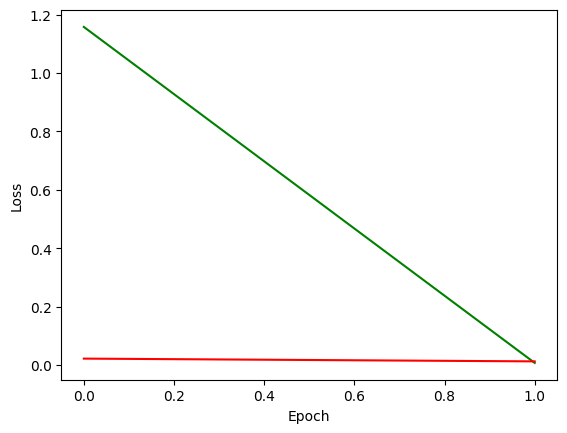

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


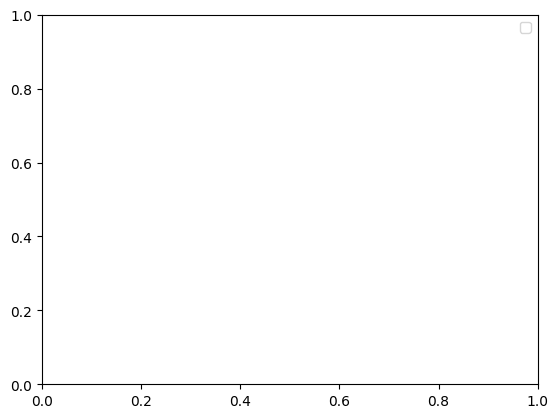

100%|██████████| 15/15 [00:06<00:00,  2.18it/s]


current patience: 0
Epoch [3/20], Training Loss: 0.005720328275315665, Validation Loss: 0.011302132159471512, Train IoU: 0.2436, Validation IoU: 0.2756


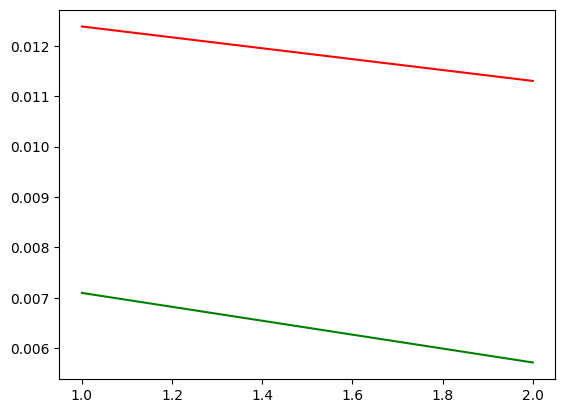

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


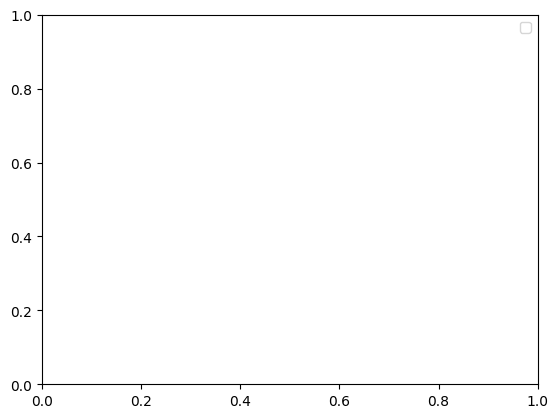

100%|██████████| 15/15 [00:06<00:00,  2.17it/s]


current patience: 0
Epoch [4/20], Training Loss: 0.005271388607955462, Validation Loss: 0.010824483287121569, Train IoU: 0.2633, Validation IoU: 0.2953


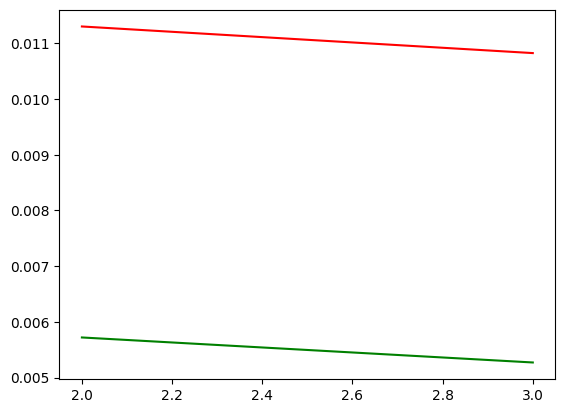

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


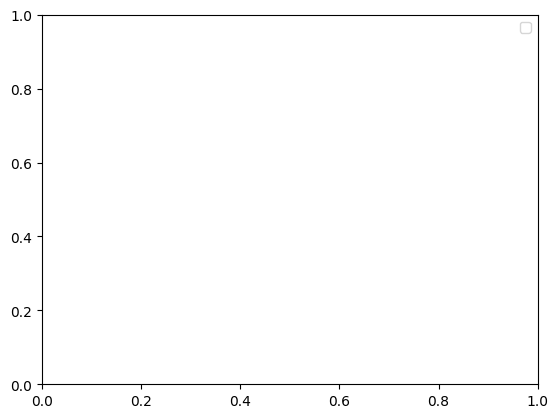

100%|██████████| 15/15 [00:06<00:00,  2.17it/s]

current patience: 1
Epoch [5/20], Training Loss: 0.005117397679871804, Validation Loss: 0.011433737285967385, Train IoU: 0.2686, Validation IoU: 0.2706


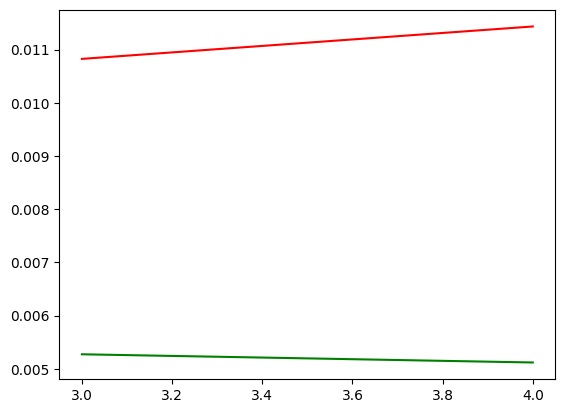

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


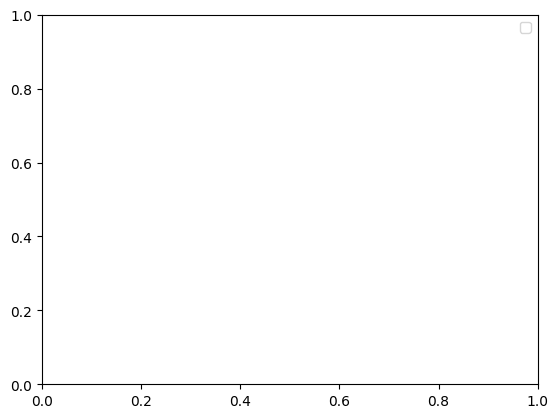

100%|██████████| 15/15 [00:07<00:00,  2.05it/s]

current patience: 2
Epoch [6/20], Training Loss: 0.004982833794595019, Validation Loss: 0.01074215889509235, Train IoU: 0.2735, Validation IoU: 0.2870


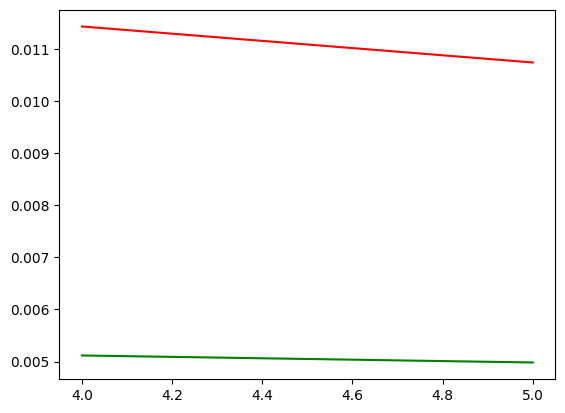

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


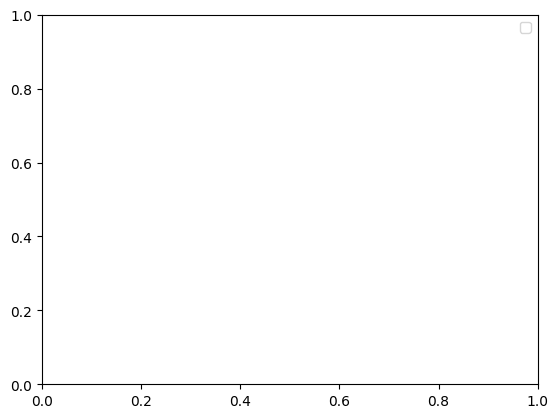

100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

current patience: 3
Epoch [7/20], Training Loss: 0.004635881877982536, Validation Loss: 0.01067500894090959, Train IoU: 0.2867, Validation IoU: 0.2785


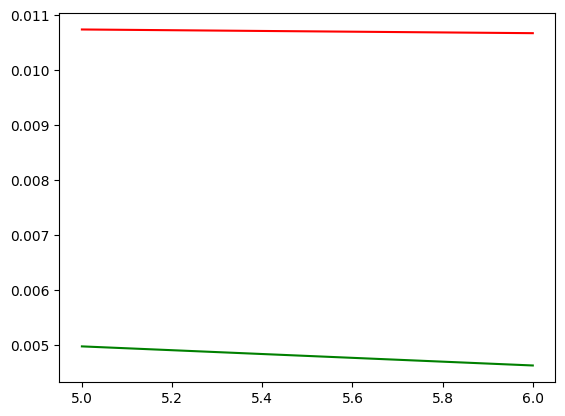

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


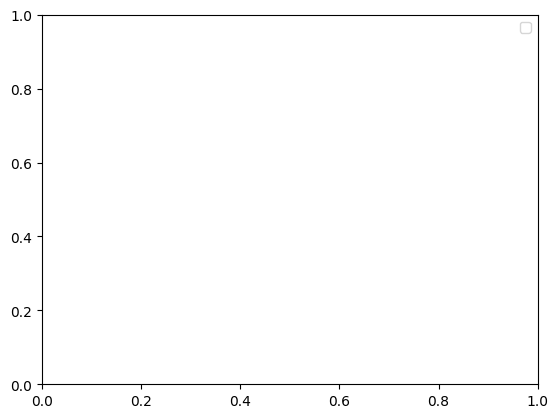

100%|██████████| 15/15 [00:07<00:00,  2.06it/s]


current patience: 0
Epoch [8/20], Training Loss: 0.0042451898114302675, Validation Loss: 0.010180681910631912, Train IoU: 0.3034, Validation IoU: 0.3007


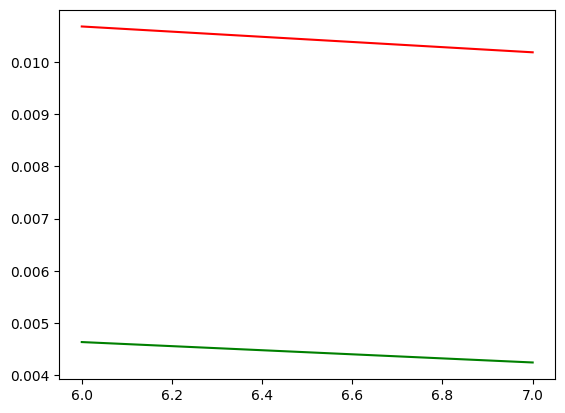

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


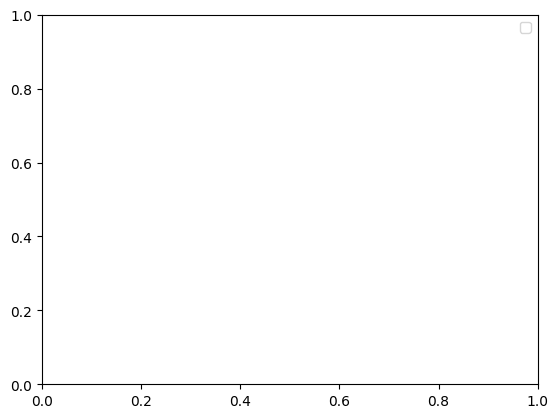

100%|██████████| 15/15 [00:07<00:00,  2.09it/s]


current patience: 0
Epoch [9/20], Training Loss: 0.0036160198505967855, Validation Loss: 0.010743650208626474, Train IoU: 0.3345, Validation IoU: 0.3105


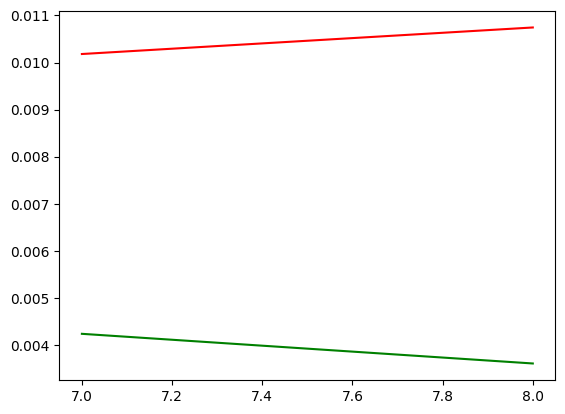

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


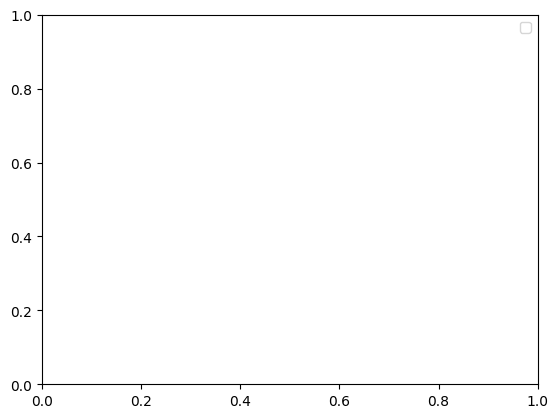

100%|██████████| 15/15 [00:06<00:00,  2.17it/s]

current patience: 1
Epoch [10/20], Training Loss: 0.0029474193028904295, Validation Loss: 0.01093196522976671, Train IoU: 0.3770, Validation IoU: 0.2879


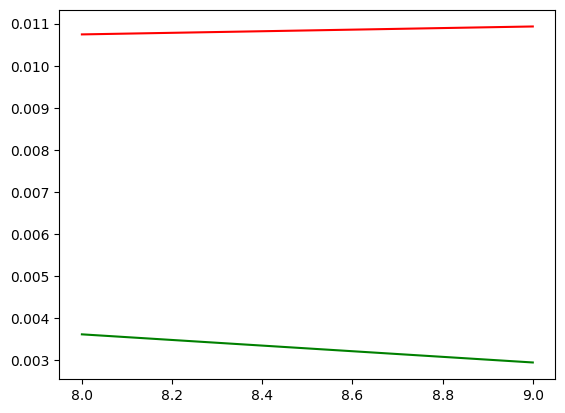

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


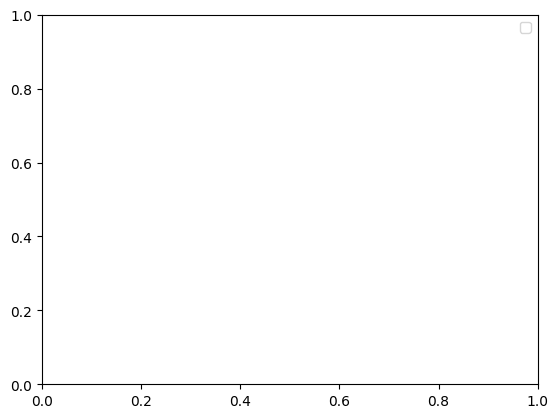

100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

current patience: 2
Epoch [11/20], Training Loss: 0.0023129395196667393, Validation Loss: 0.010709436510556511, Train IoU: 0.4178, Validation IoU: 0.2837


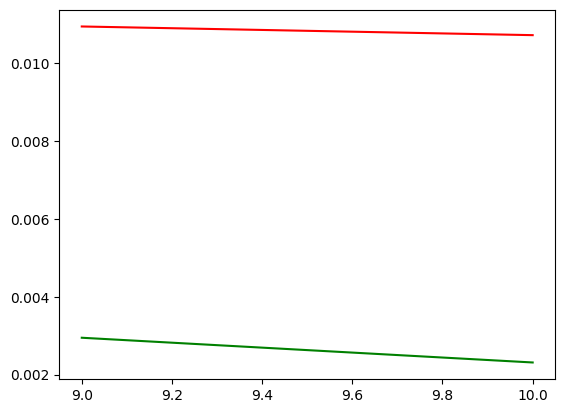

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


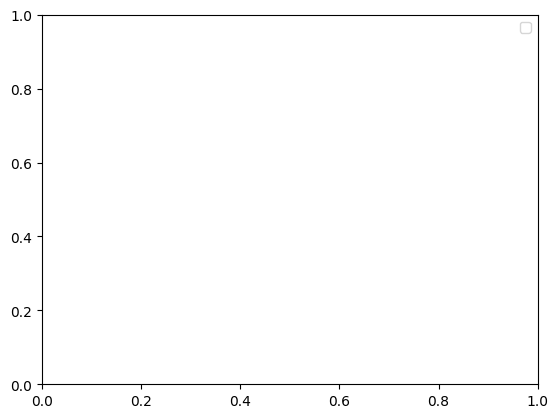

100%|██████████| 15/15 [00:07<00:00,  2.09it/s]

current patience: 3
Epoch [12/20], Training Loss: 0.001691719049877311, Validation Loss: 0.010762695522446717, Train IoU: 0.4808, Validation IoU: 0.2920


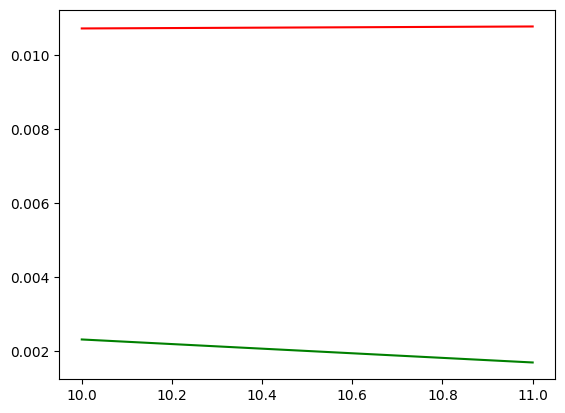

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


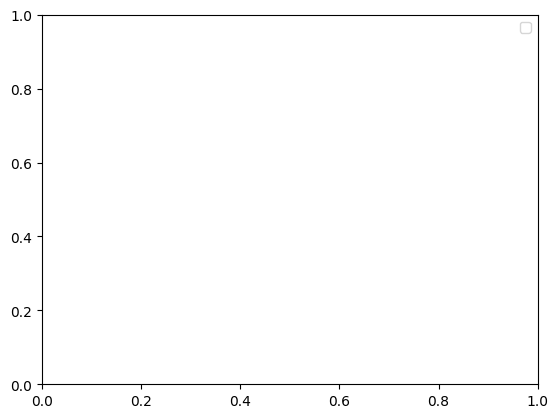

100%|██████████| 15/15 [00:07<00:00,  2.03it/s]

current patience: 4
Epoch [13/20], Training Loss: 0.0012802241725620588, Validation Loss: 0.011494197616619723, Train IoU: 0.5208, Validation IoU: 0.2809


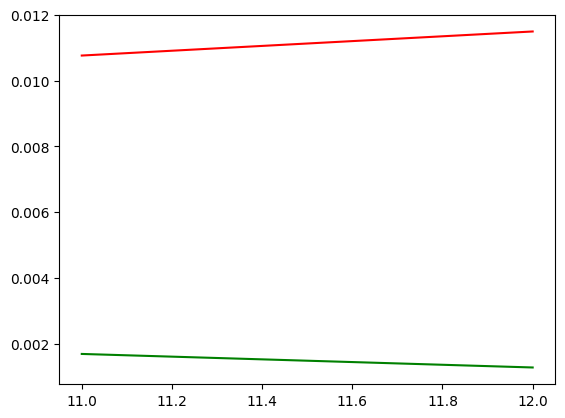

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


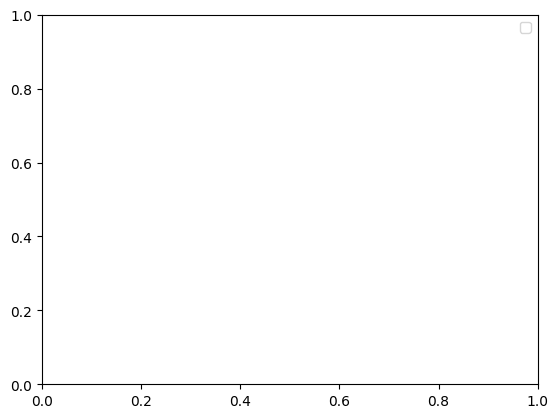

100%|██████████| 15/15 [00:08<00:00,  1.83it/s]


current patience: 5
Early stopping at epoch 13 due to lack of improvement.


In [7]:
import utils
import model
import train
import hyperparameters
import inference
import torch


train_path = "data/train"
valid_path = "data/valid"
test_path = "data/test"
train_dataloader = utils.load_images_from_folder(train_path)
valid_dataloader = utils.load_images_from_folder(valid_path)
model = model.Model()
train.train(model, train_dataloader,valid_dataloader, hyperparameters.num_epochs)
utils.save_model(model)

![Alt Text](results/graph.png)

## Experiments
To validate the efficacy of our custom-built CNN model in detecting and localizing anime faces, a series of rigorous experiments were conducted. The results not only corroborate the feasibility of our approach but also provide insights into its limitations and possible areas of improvement.

| Experiment | Batch Size | Num Epochs | Learning Rate | Patience | Kernel Size | Data Type     | IoU    | Convergence |
|------------|------------|------------|---------------|----------|-------------|---------------|--------|-------------|
| 1          | 32         | 20         | 0.001         | 5        | 3           | Original data | 18.89% | 3           |
| 2          | 128        | 30         | 0.001         | 5        | 3           | Original data | 17.27% | 6           |
| 3          | 32         | 20         | 0.001         | 5        | 5           | Cleaned data  | 28.77% | 14          |
| 4          | 64         | 20         | 0.01          | 5        | 5           | Cleaned data  | 28.83% | 17          |
| 5          | 32         | 20         | 0.001         | 5        | 3           | Cleaned data  | 32.72% | 10          |



## Results
Common failure modes included intricate backgrounds, overlapping faces, and non-standard facial orientations. Images with muted color contrasts posed a challenge, indicating a possible area for enhancement in future model iterations.

![Alt Text](results/results.jpg)

## Conclusion
Our project on anime face detection using the PyTorch framework has yielded important insights and outcomes. Through a series of five experiments, we explored various hyperparameters, including batch size, epochs, learning rate, and kernel size. Despite these efforts, the initial IoU scores remained around 18-20%. This challenge was largely attributed to the complexity of anime images, where multiple faces and limited annotations for some faces, coupled with varying visibility and color schemes, posed significant hurdles.

However, our efforts weren't in vain. By meticulously curating a subset of high-quality images, we managed to significantly improve the IoU score, achieving a commendable 32%. This accomplishment was achieved by selecting images that showcased better potential for accurate face detection, effectively leveraging the strengths of our model while acknowledging its simplicity.

Looking ahead, there are several avenues for future exploration and expansion. One approach could involve enhancing the dataset with more diverse annotations, encompassing multiple faces within an image and addressing variations in facial visibility and color schemes. Moreover, exploring more advanced and complex models could yield even better results, especially when dealing with the intricacies of anime images. Additionally, adapting the model for real-time applications or extending it to recognize other elements within anime scenes, such as objects or expressions, could open up new avenues for practical use. In summary, our journey has highlighted both the challenges and potential in anime face detection, paving the way for exciting future research and applications.